# PROYECTO FINAL HERRAMIENTAS COMPUTACIONALES #

CAMILO GARCIA 201417471

## OBJETIVOS ##

- Trabajar con diferentes bases de datos en formatos h5, excel y csv.
- Analizar la velocidad del viento en diferentes epocas de la ciudad Beresford, South Dakota
- Grafica de fraccion de tiempo contra velocidad del viento de los datos anteriores
- Grafica de frecuencia acumulada contra velocidad del viento para los datos anteriores
- Importacion de 2 tipos de aerogeneradores diferentes.
- Calcular factor de planta y cantidad de energia generada en un intervalo de tiempo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### ARCHIVOS H5###

Lo primero que se intento realizar es analizar los datos de una base de datos h5. El proble de los archivos en este formato es que no se puede leer previamente los datos en un block de notas o algo parecido, lo unico que se puede leer son las columnas que posee para poderlas importar. A continuacion se presenta el codigo para importar un base de datos h5 en forma de datasets.

In [2]:
f = h5py.File('all.h5', 'r')
f.keys()

dset1 = f['mean']
dset2 = f['wk']
dset3 = f['n']
dset4 = f['std']
dset5 = f['datetime']
dset6 = f['latitude']
dset7 = f['longitude']

Tambien se genero una funcion para importar los datos de la misma manera anterior.

In [3]:
def  importardatos(nombrearchivo,nombrecolumna):
    f=h5py.File('nombrearchivo',+'.h5', 'r')
    dset=f[nombrecolumna];

    return dset

In [4]:
h5f = h5py.File('all.h5','r')
b = h5f['mean'][:]

Despues de jugar con los datasets importados no se encontro mucho con que trabajar en los datos, la unica grafica interesante es la de latitud vs longitud de los aerogeneradores instalados en Estados Unidos. Podemos ver que hay por lo menos un aerogenerador instalado en todos los estados de norteamerica excepto por la parte sur.

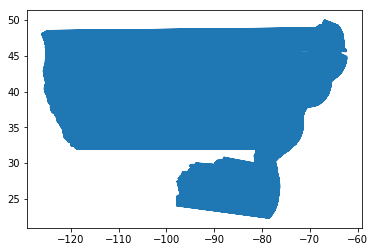

In [5]:
plt.plot(dset7,dset6)

In [6]:
dset1.shape
#dset5=np.reshape(dset5,(24,2557), order='F')
#plt.plot(dset7,dset6)

(581777, 24)

Por ultimo se grafico se realizo una grafica 3d donde en el eje x y y van la latitud y longitud y en el z la velocidad del viento. Podemos ver entonces los lugares donde hay mayor velocidad del viento a travez de las regiones de Estados Unidos registradas

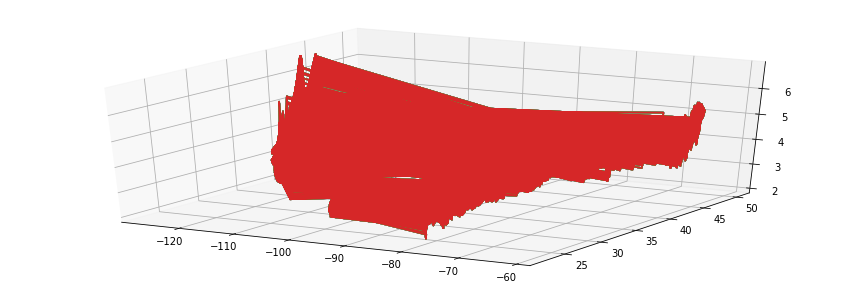

In [7]:

fig=plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, projection='3d')

for i in range (0,24):
    ax.plot(dset7, dset6,dset4[:,1])





### ARCHIVOS .CSV ###

Ahora analizaremos una base de datos para distribuciones de velocidades del viento en la ciudad de Beresford, South Dakota a lo largo de un mes. Se espera encontrar la distribucion de velocidades, cada cuanto se repiten estas velocidades y la grafica de fraccion de tiempo contra velocidad caracteristica en en analisis de aprovechamiento de energia eolica.

In [8]:
pwd

'/Users/camilogarciatorres/Documents/GitHub/ProyectoFinal/dnn/final'

Primero debemos importar la base de datos .csv y convertirla en un diccionario util para trabajar los datos

In [9]:
os.listdir(u'/Users/camilogarciatorres/Documents/GitHub/ProyectoFinal/dnn/final')

['.DS_Store',
 '.ipynb_checkpoints',
 '__pycache__',
 'all.h5',
 'beresford051201.csv',
 'beresford060102.csv',
 'beresford061203.csv',
 'datasets',
 'EnerconE70.xlsx',
 'hour.h5',
 'lr_utils2.py',
 'NordexN90.xlsx',
 'proyecto.ipynb',
 'untitled']

In [10]:
base_dir = os.path.join( '.','data')
fuente = 'beresford051201'
union = os.path.join(fuente+'.csv')
beresford= pd.read_csv(union, sep = ',', skiprows=55,
                encoding='latin-1')

In [11]:
beresford.head()

,Time Stamp,Average Speed,Standard Deviation,Average Direction
0,12/1/05 16:40,6.7,0.86,113
1,12/1/05 16:50,4.6,1.02,113
2,12/1/05 17:00,5.5,0.64,113
3,12/1/05 17:10,6.5,0.64,113
4,12/1/05 17:20,7.7,0.75,135


In [12]:
numdatos = range(len(beresford))
numdatos

range(0, 4720)

Con la libreria importada podemos graficar todos los datos presentes en terminos de la velocidad del viento de todos en la ciudad de Beresford en un periodo de tiempo de un mes

Text(0,0.5,'Velocidad del viento m/s')

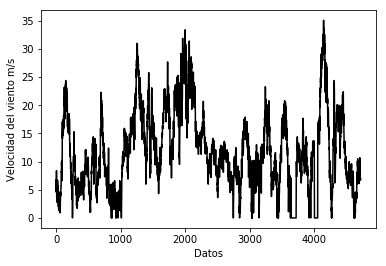

In [13]:
pylab.plot(numdatos,beresford['Average Speed'],'-k')
pylab.xlabel("Datos")
pylab.ylabel("Velocidad del viento m/s")

Ahora usaremos la funcion Counter la cual genera otro diccionario en el cual cuenta el numeo de veces que se repiten ciertos valores o 'keys'. Lo practico de la funcion Counter para este caso es que cuenta los valores en numero enteros. El problema para el caso de nuesta base de datos es que los numeros de velocidades decimales no son tomados en cuenta, como la velocidad medida en el anemometro no cambia de manera tan drastica es como si 6 valores de la funcion inicial se convirtieran en 1 valor en counter

De lo anterior podemos ver que de 4776 valores se convieron a 314 valores. Es decir, Counter genera un filtro que casi que convierte 6 valores a 1. Esto ser tenido en cuenta mas adelante para generar valores de pontencia. 

Continuando con el analisis de datos. Para organizar los datos realizamos un Counter de nuevo pero esta vez con la lista sorted para que los valores contados queden organizados de menor a mayor.

In [14]:
fin=pd.DataFrame(columns=["Velocidad"])
for i in range (0,len(beresford['Average Speed'])):
    xxx=round (beresford['Average Speed'][i],0)
    ghi_dict = {"Velocidad":xxx}
    fin=fin.append(ghi_dict,ignore_index=True)

    
contfin=Counter(fin['Velocidad'])
sorted(contfin.values())
dtype1= [('Velocidad', float), ('Frecuencia', float)]
ab1=np.array(list(contfin.items()),dtype=dtype1)
ac=pd.DataFrame(np.sort(ab1,order='Velocidad'))
ac.columns=["Velocidad","Frecuencia"]
ac.head()

,Velocidad,Frecuencia
0,0.0,171.0
1,1.0,72.0
2,2.0,102.0
3,3.0,91.0
4,4.0,212.0


Ahora graficaremos estos valores para presentar una de las graficas mas comunes en el analisis de velocidades de viento. Graficamos el numero de veces que se repite une velocidad y despues la fraccion de datos que se repite una velocidad.

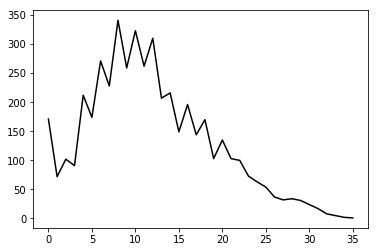

In [15]:
pylab.plot(ac["Velocidad"],ac["Frecuencia"],'-k')

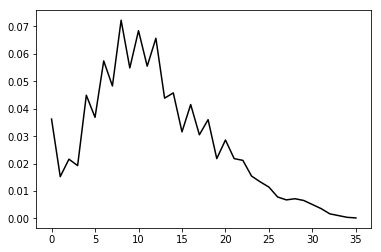

In [16]:
ac["Frecuencia"]=ac["Frecuencia"]/sum (ac["Frecuencia"])
pylab.plot(ac["Velocidad"],ac["Frecuencia"],'-k')

Por ultimo necesitamos presentar tambien la grafica de frecuencia acumulada. Para esto creamos un nuevo diccionario con una nueva columna en la cual vamos sumando las fracciones de cada velocidad con la funcion .cumsum() el resultado es la grafica de distribucion acumulada de velocidades.

In [17]:

acf=pd.DataFrame(columns=["Velocidad","Frecuencia"])

for i in range (0,len(ac)):
    v=ac["Velocidad"][i]
    f=ac["Frecuencia"][i]
    ghi_dict = {"Velocidad":v, "Frecuencia":f}
    acf=acf.append(ghi_dict,ignore_index=True)
    
acf['AcumuladaF'] = acf['Frecuencia'].cumsum()

acf.head()


,Velocidad,Frecuencia,AcumuladaF
0,0.0,0.036229,0.036229
1,1.0,0.015254,0.051483
2,2.0,0.021610,0.073093
3,3.0,0.019280,0.092373
4,4.0,0.044915,0.137288


Text(0,0.5,'Frecuencia acumulada')

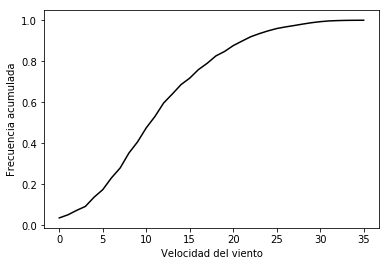

In [18]:
pylab.plot(acf['Velocidad'],acf['AcumuladaF'],'-k')
pylab.xlabel("Velocidad del viento")
pylab.ylabel("Frecuencia acumulada")

En esta seccion final se realizara una funcion para realizar todas las graficas de manera rapida para posterior analisis.

In [19]:
def graficasviento(beresford):
    fin=pd.DataFrame(columns=["Velocidad"])
    for i in range (0,len(beresford['Average Speed'])):
        xxx=round (beresford['Average Speed'][i],0)
        ghi_dict = {"Velocidad":xxx}
        fin=fin.append(ghi_dict,ignore_index=True)

    
    contfin=Counter(fin['Velocidad'])
    sorted(contfin.values())
    dtype1= [('Velocidad', float), ('Frecuencia', float)]
    ab1=np.array(list(contfin.items()),dtype=dtype1)
    ac=pd.DataFrame(np.sort(ab1,order='Velocidad'))
    ac.columns=["Velocidad","Frecuencia"]
    ac["Frecuencia"]=ac["Frecuencia"]/sum (ac["Frecuencia"])
    acf=pd.DataFrame(columns=["Velocidad","Frecuencia"])
    
    for i in range (0,len(ac)):
        v=ac["Velocidad"][i]
        f=ac["Frecuencia"][i]
        ghi_dict = {"Velocidad":v, "Frecuencia":f}
        acf=acf.append(ghi_dict,ignore_index=True)
    
    acf['AcumuladaF'] = acf['Frecuencia'].cumsum()

    figure(figsize(15,7))
    plt.subplot(2,1,1)
    pylab.plot(ac["Velocidad"],ac["Frecuencia"],'-k')
    pylab.xlim([0,50])
    pylab.xlabel("Velocidad del viento m/s")
    pylab.ylabel("Fraccion de tiempo")
    
    plt.subplot(2,1,2)
    pylab.plot(acf['Velocidad'],acf['AcumuladaF'],'-k')
    pylab.xlim([0,50])
    pylab.xlabel("Velocidad del viento")
    pylab.ylabel("Frecuencia acumulada")
    
    

### EXCEL ###

Ahora usaremos los datos de aerogeneradores que se encuentran en archivos de excel. Estos datos constaran de un array de 2 columnas: Una de velocidad de viento y otra de la potencia que genera a dicha velocidad. Primero debemos importar el archivo de datos.

In [20]:

df = pd.read_excel('EnerconE70.xlsx')

#print the column names
print (df.columns)

#get the values for a given column
values = df['Viento'].values

#get a data frame with selected columns
FORMAT = ['Viento', 'Potencia']
Aeroturbina= df[FORMAT]


Index(['Viento', 'Potencia'], dtype='object')


Ahora imprimiremos la grafica caracteristica de los aerogeneradores.

Text(0.5,0,'Velocidad del viento m/s')

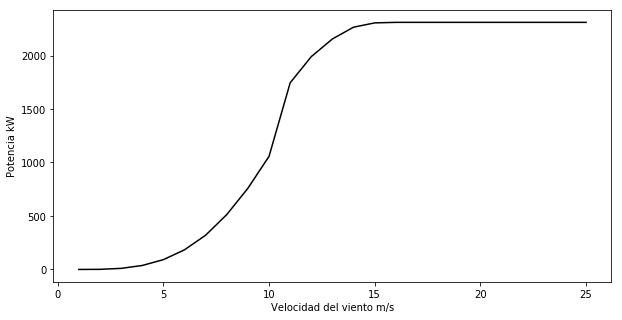

In [21]:
figure(figsize(10,5))
pylab.plot(Aeroturbina["Viento"],Aeroturbina["Potencia"],'-k')
pylab.ylabel("Potencia kW")
pylab.xlabel("Velocidad del viento m/s")

Ahora traemos el array de datos de la distribucion de viento analizada en la seccion anterior con el fin de poder calcular la energia total producida en un mes se se coloca una turbina especifica.

Por ultimo, por medio de un doble for, relacionamos las velocidades de los 2 array y calculamos la energia total generada en 1 mes, en el lugar seleccionado (en este caso beresford) si se pondria la turbina eolica. La energia en este caso se calcula como:

<center>$EnergiaTotal[kWh]=P[kW]*Frecuencia [h]$</center>

Tambien es posible calcular el factor de planta de la turbina eolica instalada y ver que tan "eficiente es esta misma". Para calcular el factor de planta tenemos:

<center> $FP=\dfrac{EnergiaTotal}{Pmax*\sum{horas totales}} $</center>



In [22]:


for i in range (0,size(Aeroturbina["Viento"])):
    for j in range (0,size(acf["Frecuencia"])):
        if Aeroturbina["Viento"][i]==acf["Velocidad"][j]:
            kw1=Aeroturbina["Potencia"]*acf["Frecuencia"]
            
            final=sum(kw1)                    

total=Aeroturbina["Potencia"][size(Aeroturbina["Viento"])-1]*sum (acf["Frecuencia"])
FP=final/total
FP



0.58396998128989663

Esta ultima seccion es para generar la funcion que calcula la energia total generada y el factor de potencia. Los valores de entrada son 2 array, el primero es de un aerogenerador y el segundo de la distribucion del viento. La salida son energia en kWh y FP.

In [23]:
def EnergiayFP(Aero,dist):
    for i in range (0,size(Aero["Viento"])):
        for j in range (0,size(dist["Frecuencia"])):
            if Aero["Viento"][i]==dist["Velocidad"][j]:
                kw1=Aero["Potencia"]*dist["Frecuencia"]
                final=sum(kw1)                    

    total=Aeroturbina["Potencia"][size(Aeroturbina["Viento"])-1]*sum (dist["Frecuencia"])
    FP=final/total
    y=('La energia producida en un mes por el aerogenerador es', final, 'KWh')
    x=('El factor de planta del aerogenerador es igual a', FP)
    return y,x

In [24]:
EnergiayFP(Aeroturbina,acf)

(('La energia producida en un mes por el aerogenerador es',
  1348.9706567796609,
  'KWh'),
 ('El factor de planta del aerogenerador es igual a', 0.58396998128989663))

## ANALISIS ##

En esta seccion se usaran todas las funciones y graficas anteriores para analizar 2 periodos de tiempo diferentes en la ciudad de Beresford. Inicialmente se buscaba que fueran 2 lugares diferentes pero debido a la dificultad de encontrar una base de datos se utilizara la misma ciudad. Tambien se utilizaran 2 diferentes aerogenerados de empresas conocidas, como lo son Enercon y Nordex para ver cual es mas eficiente para la ciudad. Primero importamos los 2 datos de Beresford:

In [25]:
#base_dir = os.path.join( '.','data')
fuente = 'beresford060102'
union = os.path.join(fuente+'.csv')
b2006= pd.read_csv(union, sep = ',', skiprows=55,
                encoding='latin-1')

#base_dir = os.path.join( '.','data')
fuente1 = 'beresford061203'
union2 = os.path.join(fuente1+'.csv')
b2007= pd.read_csv(union2, sep = ',', skiprows=55,
                encoding='latin-1')

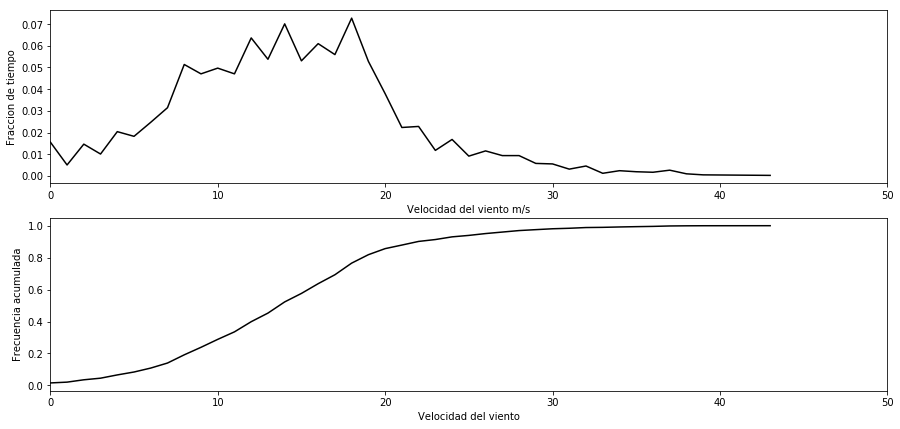

In [26]:
graficasviento(b2006)

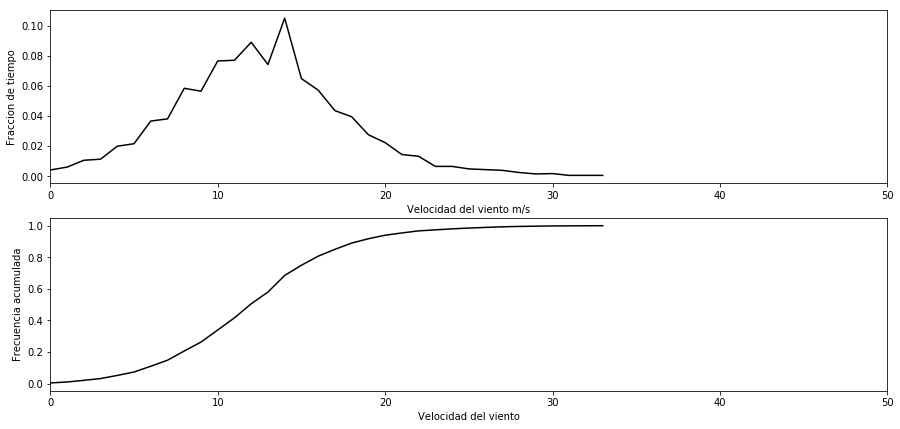

In [27]:
graficasviento(b2007)

De lo que podemos ver la distribucion de velocidades no varia significativamente de un año a otro. Esto se probara al final con la energia genereda. Ahora importaremos los datos de los 2 aerogeneradores disponibles:

Text(0,0.5,'Potencia [kW]')

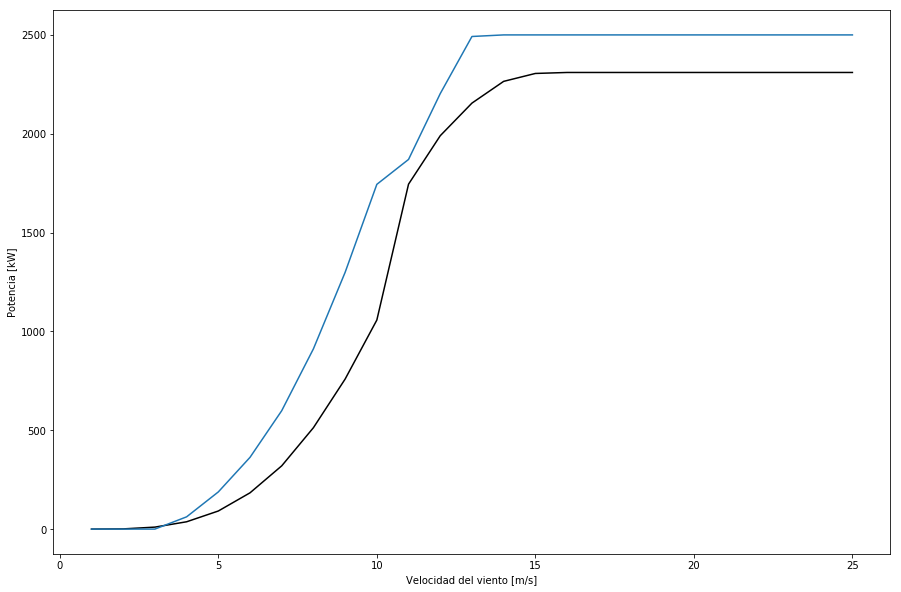

In [28]:

df = pd.read_excel('EnerconE70.xlsx')
values = df['Viento'].values
FORMAT = ['Viento', 'Potencia']
Enercon= df[FORMAT]

df = pd.read_excel('NordexN90.xlsx')
values = df['Viento'].values
FORMAT = ['Viento', 'Potencia']
Nordex= df[FORMAT]

figure(figsize(15,10))

pylab.plot(Enercon["Viento"],Enercon["Potencia"],'-k')
pylab.plot(Nordex["Viento"],Nordex["Potencia"])
pylab.xlabel("Velocidad del viento [m/s]")
pylab.ylabel("Potencia [kW]")



Como podemos ver los 2 aerogeneradores tienen graficas pareciadas (en general las graficas de potencia de los aerogeneradores se comportan de la misma manera) sin embargo podemos ver que el aerogenerador Nordex tiene una velocidad pico menor alrededor de los 12 m/s contra los 15 m/s de el aerogenerador Enercon y por lo tanto alcanza potencia maxima mas rapido. Es de esperarse entonces que el aerogenerador Nordex genere mas energia, sin embargo esto puede significar mayor costo del equipo.

In [35]:
fin=pd.DataFrame(columns=["Velocidad"])
for i in range (0,len(b2006['Average Speed'])):
    xxx=round (b2006['Average Speed'][i],0)
    ghi_dict = {"Velocidad":xxx}
    fin=fin.append(ghi_dict,ignore_index=True)

    
contfin=Counter(fin['Velocidad'])
sorted(contfin.values())
dtype1= [('Velocidad', float), ('Frecuencia', float)]
ab2=np.array(list(contfin.items()),dtype=dtype1)
ac2=pd.DataFrame(np.sort(ab2,order='Velocidad'))
ac2.columns=["Velocidad","Frecuencia"]
ac2["Frecuencia"]=ac2["Frecuencia"]/sum (ac2["Frecuencia"])

fin=pd.DataFrame(columns=["Velocidad"])
for i in range (0,len(b2007['Average Speed'])):
    xxx=round (b2007['Average Speed'][i],0)
    ghi_dict = {"Velocidad":xxx}
    fin=fin.append(ghi_dict,ignore_index=True)

    
contfin=Counter(fin['Velocidad'])
sorted(contfin.values())
dtype1= [('Velocidad', float), ('Frecuencia', float)]
ab3=np.array(list(contfin.items()),dtype=dtype1)
ac3=pd.DataFrame(np.sort(ab3,order='Velocidad'))
ac3.columns=["Velocidad","Frecuencia"]
ac3["Frecuencia"]=ac3["Frecuencia"]/sum (ac3["Frecuencia"])

In [36]:
EnergiayFP(Enercon,ac2)

(('La energia producida en un mes por el aerogenerador es',
  1713.028123504069,
  'KWh'),
 ('El factor de planta del aerogenerador es igual a', 0.74157061623552778))

In [ ]:
EnergiayFP(Enercon,ac2)

In [ ]:
EnergiayFP(Nordex,ac3)

In [37]:
EnergiayFP(Nordex,ac3)

(('La energia producida en un mes por el aerogenerador es',
  1964.7374341790332,
  'KWh'),
 ('El factor de planta del aerogenerador es igual a', 0.85053568579178929))

De los anteriores valores se pueden analizar varias cosas: 

- Primero, podemos ver como la distrubucion de velocidades, que a simple vista no vario mucho, puede generar una diferencia de alrededor de 1000 kWh de un mes a otro, lo cual es una cantidad significativa de energia en especial para un ciudad pequeña. 

- Segundo, los factores de planta tanto para de los generadores (entre 0.38 a 0.46) son valores viables para la instalacion de estos mismos y pueden ser proyectos rentables, sin embargo tambien es necesario revisar otras variables como el costo total de instalacion y mantenimiento y el costo de generar el kWh en la ciudad para saber si es viable el proyecto.

- Tercero, como se habia comentado antes, el factor de potencia y la energia generada de el aerogenerador Nordex es mayor a la de el aerogenerador Enercon. Esto se debe a que Nordex tiene una velocidad pico menor. Esto probablemente se traduzca en un costo mayor de la compra e instalacion del aerogenerador Nordex.

## CONCLUSIONES ##

- Para futuros trabajos, se debe tratar de mejorar el uso de Counter para no perder tantos de velocidad del viento tomados experimentalmente. Si es posible incluso crear una funcion.

- Se podria buscar otras bases de datos para analizar diferentes lugares.

- El aumento del factor de planta final depende tanto de la distribucion de viento del lugar como del aerogenerador. Por eso es importante probar con varios aerogeneradores.

- En general, un aerogenerador de mayor tamaño es mas eficiente y tiene mayor factor de planta. Aunque tambien depende de la distribucion de velocidades, se podria trabajar con aerogeneradores de diferente tamaño para ver el resultado.